sourcecode: https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e  
dataset : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# path = '/content/drive/MyDrive/MSIB/09. Evaluasi Model/'

In [4]:
df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA (Exploratory Data Analysis)

In [5]:
df.isnull().values.any()

False

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


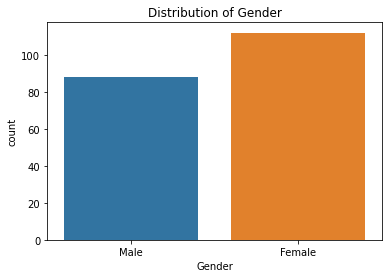

In [7]:
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

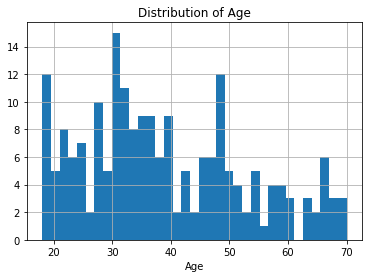

In [8]:
# Create a histogram of ages
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

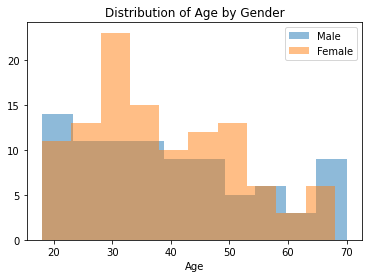

In [9]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

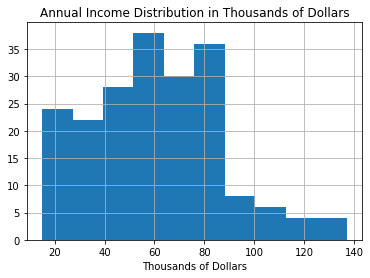

In [10]:
df.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

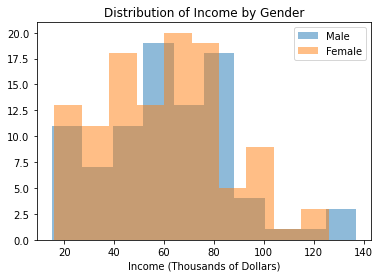

In [11]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

In [12]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


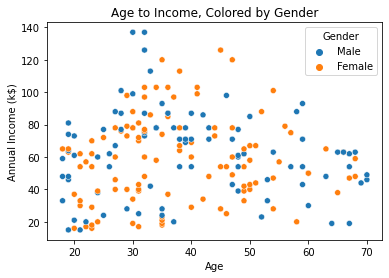

In [13]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=df);
plt.title('Age to Income, Colored by Gender');

<AxesSubplot:>

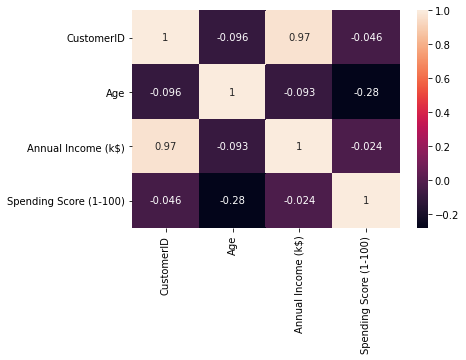

In [14]:
sns.heatmap(male_customers.corr(), annot=True)

#Tidak ada korelasi yg jelas

D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


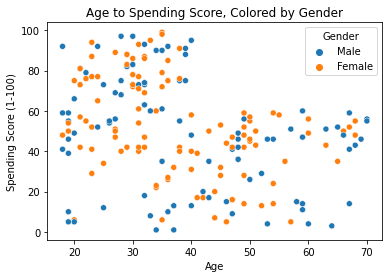

In [15]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=df);
plt.title('Age to Spending Score, Colored by Gender');

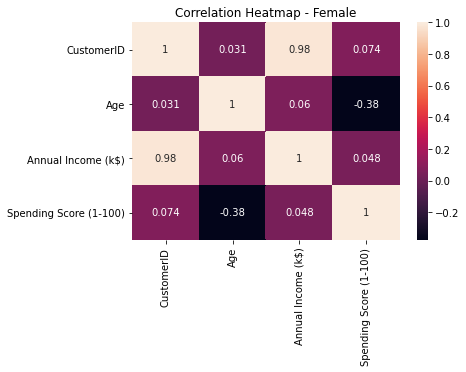

In [16]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


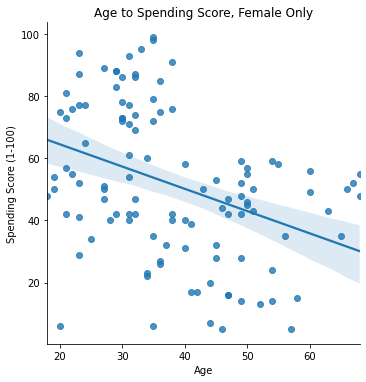

In [17]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only');

D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


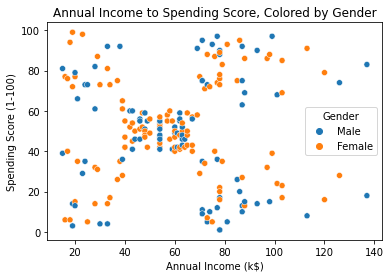

In [18]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=df);
plt.title('Annual Income to Spending Score, Colored by Gender');

## SEGMENTATION WITH KMEANS


In [19]:
col = ['Annual Income (k$)', 'Spending Score (1-100)']
customers = df[col]
customers.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(customers)

KMeans(n_clusters=5)

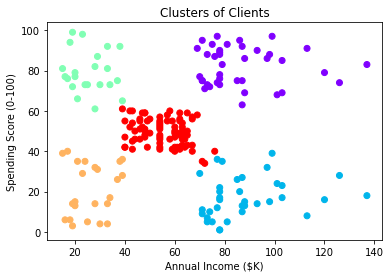

In [21]:
plt.scatter(customers['Annual Income (k$)'],customers['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
plt.title("Clusters of Clients")
plt.xlabel("Annual Income ($K)")
plt.ylabel("Spending Score (0-100)")
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(customers,kmeans.labels_)

0.553931997444648

In [24]:
customers['Labels'] = kmeans.labels_
customers.head()

<ipython-input-24-c489a5ce9ec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Labels'] = kmeans.labels_


,Annual Income (k$),Spending Score (1-100),Labels
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3
